Given the following patterns

$$P_1, t_1 = (2,7) , A $$
$$P_2, t_2 = (3,9) , A $$
$$P_3, t_3 = (4,4) , A $$
$$P_4, t_4 = (6,11) , A $$
$$P_5, t_5 = (7,4) , A $$
$$P_6, t_6 = (5,7) , B $$
$$P_7, t_7 = (8,9) , B $$
$$P_8, t_8 = (8,6) , B $$
$$P_9, t_9 = (10,9) , B $$
$$P_{10}, t_{10} = (10,6) , B $$

Train a neural network to classify correclty an input based on the training set using the backpropagation algorithm.


In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

In [14]:
import numpy as np

#create input vector 
def createInputVector():
    p[0] = [2,7];
    p[1] = [3,9];
    p[2] = [4,4];
    p[3] = [6,11];
    p[4] = [7,4];
    p[5] = [5,7];
    p[6] = [8,9];
    p[7] = [8,6];
    p[8] = [10,9];
    p[9] = [10,6];
    print("p:",str(p));
    
p = np.zeros((10,2));
createInputVector();

p: [[ 2.  7.]
 [ 3.  9.]
 [ 4.  4.]
 [ 6. 11.]
 [ 7.  4.]
 [ 5.  7.]
 [ 8.  9.]
 [ 8.  6.]
 [10.  9.]
 [10.  6.]]


In [15]:
#create target vector A = 1 and B = 1 
def createTargetVector():
    t[0] = 1;
    t[1] = 1;
    t[2] = 1;
    t[3] = 1;
    t[4] = 1;
    t[5] = 0;
    t[6] = 0;
    t[7] = 0;
    t[8] = 0;
    t[9] = 0;
    print("t:",str(t));
    
t = np.zeros(10);
createTargetVector();

t: [1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]


In [16]:
# translate perceptron output
def translatePerceptronOutput(p, output):
    print("input: ", str(p), "output: ", str(output));
    if output > 0.5: 
        print("Classified as A");
    else:
        print("Classified as B");

In [17]:
#define nueral network class
class NeuralNetwork:
    
    def __init__(self, p_training, t_training, learning_rate, hidden_layer_neurons ):
        self.P = p_training;
        self.T = t_training;
        self.alfa = learning_rate;
    
        self.Errors = np.array([]);
        self.hidden_layer_neurons = hidden_layer_neurons;
        self.initW();
        self.initBias();
        
        self.hidden_a = np.zeros(2);
        self.output_a = 0;
    
    def initW(self):
        """Initialize hidden layer neuron weights"""
        self.hidden_W = np.random.rand(self.hidden_layer_neurons,len(self.P[0]));
        print("hidden layer W:", str(self.hidden_W));
        
        """Initialize output layer neuron weights"""
        self.output_W = np.random.rand(self.hidden_layer_neurons);
        print("output layer W:", str(self.output_W));
        
    def initBias(self):
        """Initialize hidden layer neuron bias"""
        self.hidden_bias = np.random.rand(self.hidden_layer_neurons);
        print("hidden layer bias:", self.hidden_bias);
        
        """Initialize output layer neuron bias"""
        self.output_bias = np.random.rand(1);
        print("output layer bias:", self.output_bias);
        
        
    def trainBackpropagationRule(self, max_epoch, target_error):
        iterations = 0;
        self.max_epoch = max_epoch;
        
        #self.plotTrainingSet();
        #self.plotDecisionBoundary('red','initial boundary');
        avg_error = 10;
        while((iterations < self.max_epoch) and (abs(avg_error) > target_error)):
            #print("Iteration------------------", iterations);
            avg_error = 0;
            for index in range(len(self.P)):
                #print("input:", str(self.P[index]));
                #print("weight:", self.W);
                #print("dotProduct:", np.dot(self.P[index],self.W));
                
                #compute hidden layer outputs 
                
                #print("hidden layer a1:",self.hidden_a[0]);
                #print("hidden layer W1:",self.hidden_W[0]);
                #print("hidden layer bias1:",self.hidden_bias[0]);
                res = self.sigmoid(np.dot(self.P[index],self.hidden_W[0]) + self.hidden_bias[0]);
                #print("hidden layer res:",res);
                self.hidden_a[0] = res;
                
                #print("hidden layer a2:",self.hidden_a[1]);
                #print("hidden layer W2:",self.hidden_W[1]);
                #print("hidden layer bias2:",self.hidden_bias[1]);
                res = self.sigmoid(np.dot(self.P[index],self.hidden_W[1]) + self.hidden_bias[1]);
                #print("hidden layer res:",res);
                self.hidden_a[1] = res;
                
                #print("hidden layer a:",self.hidden_a);
                
                #compute output layer output 
                #print("output layer W2:",self.output_W);
                #print("output layer bias:",self.output_bias);
                self.output_a = self.sigmoid(np.dot(self.hidden_a,self.output_W) + self.output_bias);
                #print("output layer a:",self.output_a);
                
                #compute the error
                self.error = self.T[index] - self.output_a;
                
                avg_error = avg_error + self.error**2;
                #print("error: ", self.error);
                
                #back propagation of sensitivities.
                
                #sensitivity of second layer
                self.s2 = -2 * self.sigmoid_derivate(self.output_a) * self.error;
                #print("sensitivity 2: ", self.s2);
                
                #sensitivity of first layer
                F = np.identity(2);
                F[0,0] = self.sigmoid_derivate(self.hidden_a[0]);
                F[1,1] = self.sigmoid_derivate(self.hidden_a[1]);
                #print("F ", F);
                self.s1 = np.matmul(F, self.output_W.T) *  self.s2;
                #print("sensitivity 1: ", self.s1);
                
                #update output layer weights.
                #print("output_W: ",self.output_W);
                #print("hidden_a:", self.hidden_a);
                #print("before substraction:", (self.alfa * self.s2 * self.hidden_a) );
                self.output_W = self.output_W - (self.alfa * self.s2 * self.hidden_a);
                #print("new output W:", self.output_W);
                
                #update output bias 
                self.output_bias = self.output_bias - (self.alfa * self.s2);
                #print("new output bias:", self.output_bias);
                
                #update hidden layer weights.
                #print("hidden_W: ",self.hidden_W);
                #print("hidden_a:", self.hidden_a);
                #print("before substraction:", (self.alfa * self.s1 * self.P[index]) );
                self.hidden_W = self.hidden_W - (self.alfa * self.s1 * self.P[index]);
                #print("new output W:", self.hidden_W);
                
                
                #update hidden bias 
                #print("hidden bias:", self.hidden_bias);
                #print("hidden bias:", (self.alfa * self.s1));
                self.hidden_bias = self.hidden_bias - (self.alfa * self.s1.T);
                #print("new hidden bias:", self.hidden_bias);
                
                
            iterations = iterations + 1;
            avg_error = avg_error / len(self.P);
            self.Errors = np.concatenate((self.Errors,avg_error),axis=0);
            
        
        #self.plotDecisionBoundary('green','final boundary');
        #plt.legend(loc="upper right");
        
        print("hidden layer W: ",self.hidden_W);
        print("hidden layer bias:", self.hidden_bias);
        print("output layer W: ",self.output_W);
        print("output layer bias:", self.output_bias);
        print("Epochs:", iterations);
    
    
    
    def sigmoid(self, x):
        return 1/(1 + np.exp(-x));
    
    def sigmoid_derivate(self,out):
        return out * (1 - out);
        
    def evaluate(self, new_p):
        a = np.zeros(2);
        a[0] = self.sigmoid(np.dot(new_p,self.hidden_W[0]) + self.hidden_bias[0]);
        a[1] = self.sigmoid(np.dot(new_p,self.hidden_W[1]) + self.hidden_bias[1]);
        
        return self.sigmoid(np.dot(a,self.output_W) + self.output_bias);
    
    def hiddenLayerTransformation(self):
        a = np.zeros(2);
        for indx in range(len(self.P)):
            a[0] = self.sigmoid(np.dot(self.P[indx],self.hidden_W[0]) + self.hidden_bias[0]);
            a[1] = self.sigmoid(np.dot(self.P[indx],self.hidden_W[1]) + self.hidden_bias[1]);
            print("P: ", self.P[indx], "-> a:", a);
            if self.T[indx] == 1:
                plt.plot(a[0],a[1], 's', color='black', label='A');
            else:
                plt.plot(a[0],a[1], '^', color='red', label='B');
        #self.plotDecisionBoundary("blue","Boundary");
    
    def plotDecisionBoundary(self, color, label):
        print('bias:',self.output_bias);
        print('W:',self.output_W);
        #plt.xlim([-1.0, 2]);
        #plt.ylim([-1.0, 2]);
        
        x = np.linspace(-1, 2, num=50);
        y = - (self.output_bias / self.output_W[1]) - ((x * self.output_W[0]) / self.output_W[1]);
        plt.plot(x, y, color=color, label=label);
    
    def plotTrainingSet(self):
        
        plt.plot(perc.P[0:3,0],perc.P[0:3,1], 's', color='black', label='A');
        plt.plot(perc.P[3:7,0],perc.P[3:7,1], '^', color='black', label='B');
    
    def plotErrors(self):
        
        plt.plot(self.Errors, label='Error');
        print("Last error:", self.Errors[-1]);
        

In [27]:
#create neural network object
neural_network = NeuralNetwork(p,t, 0.003, 2);

hidden layer W: [[0.77362168 0.64492063]
 [0.81874514 0.73225489]]
output layer W: [0.90491111 0.73682765]
hidden layer bias: [0.03818778 0.00758317]
output layer bias: [0.56386546]


In [33]:
#train network using backpropagation rule, max epoch 250,000
neural_network.trainBackpropagationRule(500000,0.03);

hidden layer W:  [[0.77177795 0.59001155]
 [0.81690142 0.67734582]]
hidden layer bias: [-6.52595401  0.01498647]
output layer W:  [-10.83293159   3.62681272]
output layer bias: [5.46099006]
Epochs: 500000


In [39]:
#evaluate new coordenate (3,7)
new_p = np.array([3,7])
res = neural_network.evaluate(new_p);
translatePerceptronOutput(new_p,res);

input:  [3 7] output:  [0.97989844]
Classified as A


In [35]:
#evaluate new coordenate (6,8)
new_p = np.array([6,8])
res = neural_network.evaluate(new_p);
translatePerceptronOutput(new_p,res);

input:  [6 8] output:  [0.24257372]
Classified as B


Last error: 0.13503665172764692


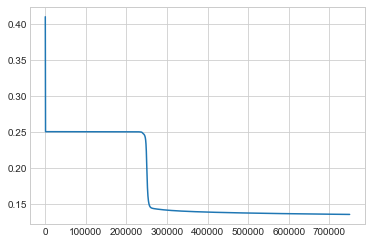

In [36]:
neural_network.plotErrors();

P:  [2. 7.] -> a: [0.29894699 0.99832491]
P:  [3. 9.] -> a: [0.75016338 0.99980876]
P:  [4. 4.] -> a: [0.25373393 0.9975075 ]
P:  [ 6. 11.] -> a: [0.98999724 0.99999574]
P:  [7. 4.] -> a: [0.77496081 0.99978457]
P:  [5. 7.] -> a: [0.81199363 0.99985533]
P:  [8. 9.] -> a: [0.99302465 0.99999678]
P:  [8. 6.] -> a: [0.96039308 0.99997544]
P:  [10.  9.] -> a: [0.99850171 0.99999937]
P:  [10.  6.] -> a: [0.99126717 0.99999521]


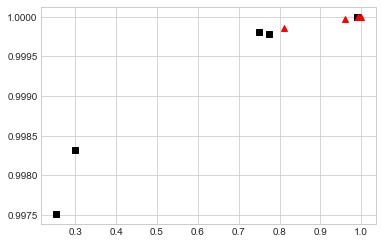

In [37]:
neural_network.hiddenLayerTransformation();

important notes:
* initialization of weights and bias with random values don´t affect to find a solution
* epoch can help to reduce erros.
* learning rate affects learning speed so the smaller the more epochs need to have a good estimate.
* solution could be different based on initial values and for that reason new inputs could be classified different.
* learning rate alters the speed of the training process 